# PCA y clustering

Prepare the information to use in the next step in the knn

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
import json
import os
import re

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
file_path = f"{ os.getcwd() }/output/"
file_folder = "05.prepoc_knn/"
file_folder_postproc = "06.final/"
file_name = "05.preproc.csv"
file_name_knn = "05.preproc_knn"
file_name_postproc = "06.final.csv"

In [4]:
random_seed = 66

In [5]:
df = pd.read_csv(
    file_path + file_folder + "/" + file_name_knn + ".csv", low_memory=False
)
# df = pd.read_parquet(file_path + file_folder + "/" + file_name_knn + ".parquet")

In [6]:
df.shape

(78859, 5000)

In [7]:
df.head(5)

01  02  02062022  020622  0705  10  100  1000  100000  108sar  ...  ótima  \
0   0   0         0       0     0   0    0     0       0       0  ...      0   
1   0   0         0       0     0   0    0     0       0       0  ...      0   
2   0   0         0       0     0   0    0     0       0       0  ...      0   
3   0   0         0       0     0   0    0     0       0       0  ...      0   
4   0   0         0       0     0   0    0     0       0       0  ...      0   

   ótimo  ônibus  última  últimas  último  últimos  única  único  úteis  
0      0       0       0        0       0        0      0      0      0  
1      0       0       0        0       0        0      0      0      0  
2      0       0       0        0       0        0      0      0      0  
3      0       0       0        0       0        0      0      0      0  
4      0       0       0        0       0        0      0      0      0  

[5 rows x 5000 columns]

In [8]:
# ! pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [9]:
Nc = range(2, 5)
kmeans_score = []
kmeans_silhoutte = []

for i in Nc:
    kmeans = KMeans(n_clusters=i, random_state=random_seed)
    kmeans_score.append(kmeans.fit(df).score(df))
    
    kmeans.fit_predict(df)
    kmeans_silhoutte.append(silhouette_score(df, kmeans.labels_, metric='euclidean'))
    # print(f"NC: { Nc[i-1] }, Score: { kmeans_score[i-1] }" + "Silhouetter Score: %.3f" % kmeans_silhoutte[i-1])

    
# kmeans = [KMeans(n_clusters=i) for i in Nc]
# kmeans
# score = [kmeans[i].fit(df_vectorized).score(df_vectorized) for i in range(len(kmeans))]
# score
                            

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


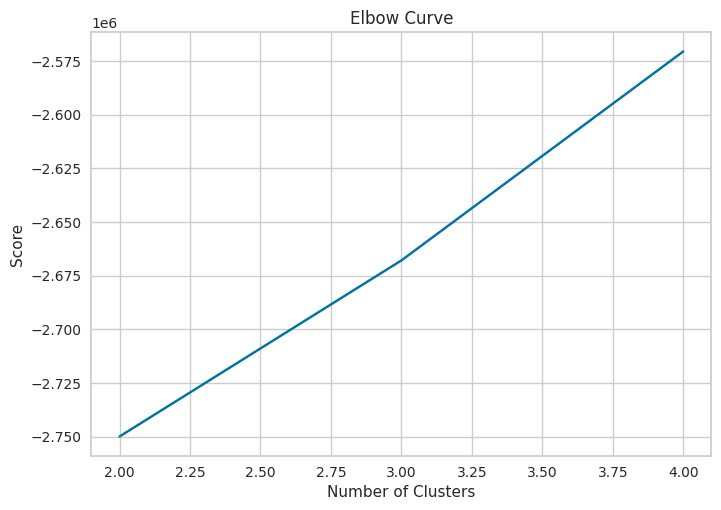

In [10]:
plt.plot(Nc, kmeans_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

In [11]:
print("Clusters")
for i in range(len(kmeans_score)):
    print(f"NC: { Nc[i] }, Score: { kmeans_score[i] }" + "Silhouetter Score: %.3f" % kmeans_silhoutte[i])

Clusters
NC: 2, Score: -2749946.3249991043Silhouetter Score: 0.704
NC: 3, Score: -2667900.5976018077Silhouetter Score: 0.548
NC: 4, Score: -2570518.1771875294Silhouetter Score: 0.546


In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=random_seed)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

visualizer.show()        # Finalize and render the figure

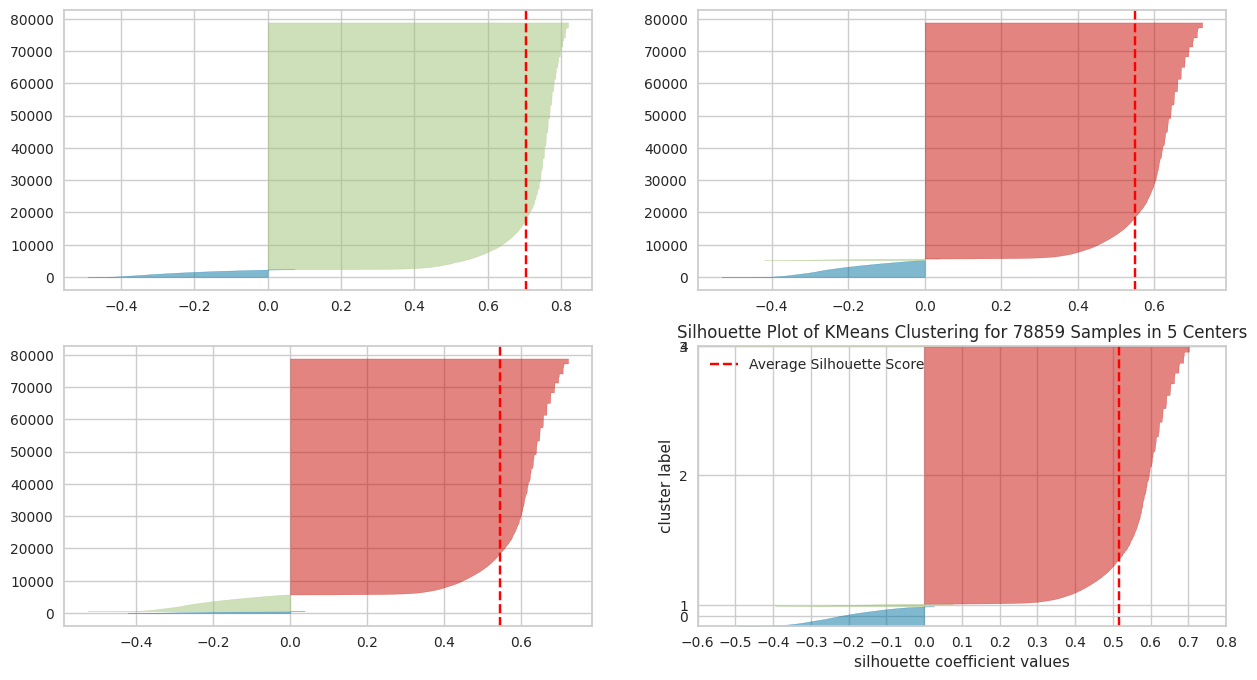

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 78859 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:

visualizer.show()        # Finalize and render the figure

In [13]:
kmeans = KMeans(n_clusters=5).fit(df_vectorized)
centroids = kmeans.cluster_centers_
print(centroids)

NameError: name 'df_vectorized' is not defined

In [ ]:
# Predicting the clusters
labels = kmeans.predict(df_vectorized)